In [ ]:
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
# X, Y = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
nsamples, nx, ny = x_train.shape
x2_train = x_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = x_test.shape
x2_test = x_test.reshape((nsamples,nx*ny))

In [ ]:
x2_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

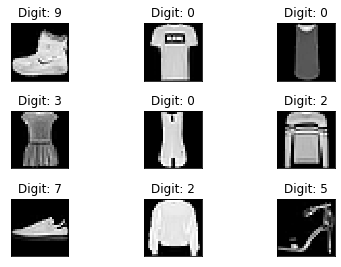

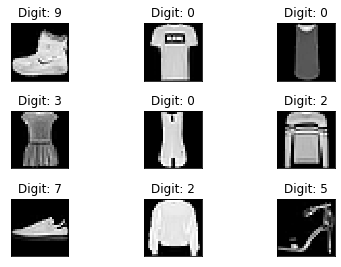

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# x2_train = x2_train[0:600,:]
# x2_test =  x2_test[0:100, :]
# y_train = y_train[0:600]
# y_test =  y_test[0:100]

In [ ]:
x2_train = MinMaxScaler(copy = False).fit_transform(x2_train)

In [ ]:
np.max(x2_train)

1.0

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
from tensorflow.keras import models

In [ ]:
model_1 = models.Sequential()

In [ ]:
from tensorflow.keras import layers

In [ ]:
x2_train.shape

(60000, 784)

In [ ]:
model_1.add(layers.InputLayer(input_shape=(28, 28, 1), name='input'))

In [ ]:
model_1.add(layers.Conv2D(32, (7, 7), activation='relu', name='convolutional'))

In [ ]:
model_1.add(layers.MaxPooling2D((2, 2), name='max_pooling'))

In [ ]:
model_1.add(layers.Flatten(name='flatten'))

In [ ]:
model_1.add(layers.Dense(100, activation='relu', name='hidden'))
model_1.add(layers.Dense(10, activation='softmax', name='output'))

In [ ]:
model_1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convolutional (Conv2D)      (None, 22, 22, 32)        1600      
                                                                 
 max_pooling (MaxPooling2D)  (None, 11, 11, 32)        0         
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 hidden (Dense)              (None, 100)               387300    
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 389,910
Trainable params: 389,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

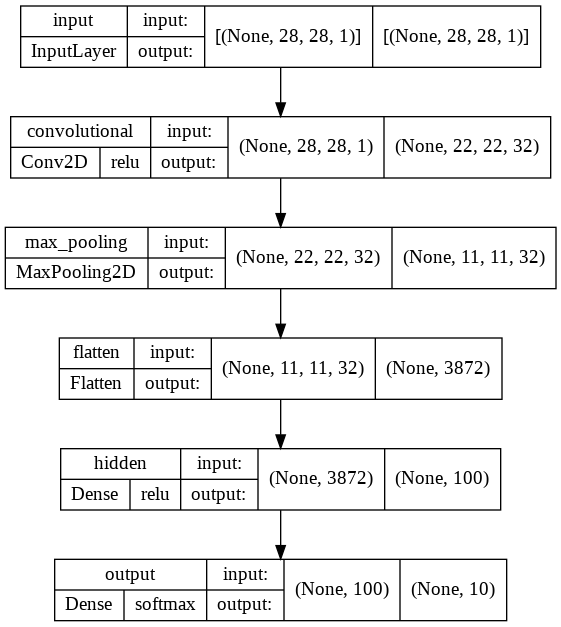

In [ ]:
plot_model(model_1, show_shapes=True, show_layer_activations=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
import os
import datetime
import tensorflow as tf
%load_ext tensorboard

In [ ]:
val_stop = EarlyStopping(monitor='val_loss', patience=5)
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb = TensorBoard(logdir, histogram_freq=1)
# %tensorboard --logdir logs

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_test = x_test.reshape(x_test.shape[0], 28, 28,1).astype('float32')
x_train = x_train.reshape(x_train.shape[0], 28, 28,1).astype('float32')

In [ ]:
x_test = x_test.reshape(x_test.shape[0], 28, 28,1).astype('float32')
x2_train = x2_train.reshape(x_train.shape[0], 28, 28,1).astype('float32')

In [ ]:
fit_1 = model_1.fit(x_train, y_train, 
                    epochs=50, 
                    # batch_size=32,
                    callbacks=[val_stop, tb],
                    validation_data=(x_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 47s 24ms/step - loss: 1.0038 - accuracy: 0.8254 - val_loss: 0.4632 - val_accuracy: 0.8495
Epoch 2/50
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4400 - accuracy: 0.8556 - val_loss: 0.4641 - val_accuracy: 0.8504
Epoch 3/50
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4258 - accuracy: 0.8630 - val_loss: 0.5182 - val_accuracy: 0.8512
Epoch 4/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4268 - accuracy: 0.8658 - val_loss: 0.5981 - val_accuracy: 0.8300
Epoch 5/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.4302 - accuracy: 0.8640 - val_loss: 0.5574 - val_accuracy: 0.8477
Epoch 6/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4320 - accuracy: 0.8640 - val_loss: 0.5644 - val_accuracy: 0.8455


In [ ]:
y_pred_1 = fit_1.model.predict(x_test)

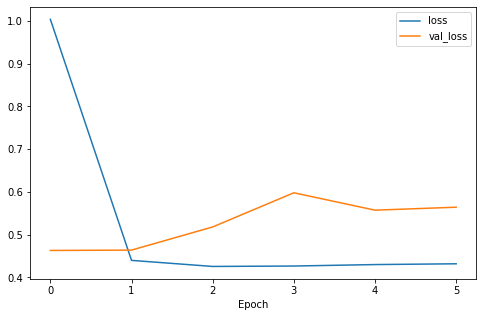

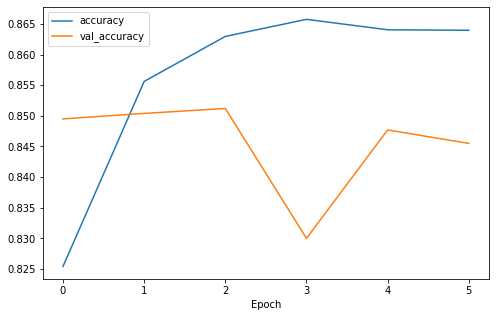

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fit_1.history['loss'], '-', label='loss')
plt.plot(fit_1.history['val_loss'], '-', label='val_loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(fit_1.history['accuracy'], '-', label='accuracy')
plt.plot(fit_1.history['val_accuracy'], '-', label='val_accuracy')
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

array([[865,   9,  33,  11,   8,   2,  60,   0,  12,   0],
       [ 11, 951,   5,  20,   4,   0,   5,   0,   4,   0],
       [ 16,   1, 737,   6, 162,   0,  72,   0,   6,   0],
       [ 36,  16,  23, 854,  34,   1,  32,   0,   3,   1],
       [  2,   5, 124,  27, 726,   0, 115,   0,   1,   0],
       [  0,   1,   1,   0,   0, 936,   0,  36,   3,  23],
       [210,   8, 144,  19,  65,   0, 534,   0,  20,   0],
       [  0,   0,   0,   0,   0,   3,   0, 982,   0,  15],
       [  2,   0,  17,   2,   5,   2,  25,   2, 945,   0],
       [  0,   0,   0,   1,   0,   6,   1,  67,   0, 925]])

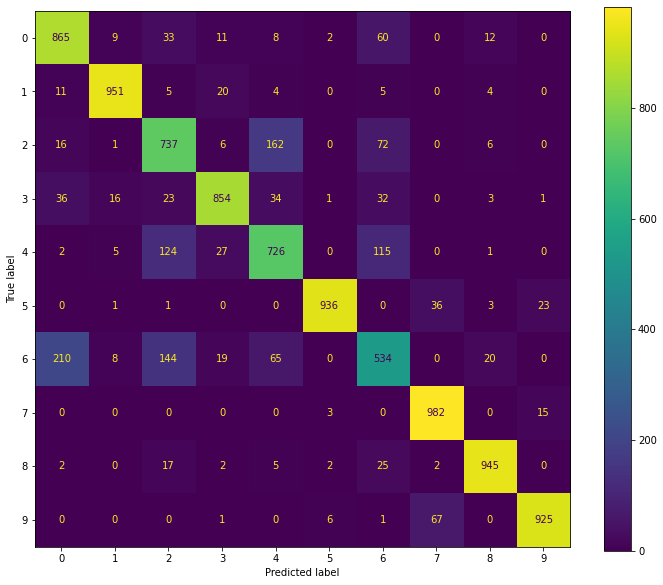

In [ ]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_1, axis=1))
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(12, 10))
cmp.plot(ax=ax)
cm